In [7]:
import numpy as np 
import pandas as pd 

In [8]:
f=pd.read_csv('F:\dataset/phishing_dataset.csv')

In [9]:
f.head()


index  having_IPhaving_IP_Address  URLURL_Length  Shortining_Service  \
0      1                          -1              1                   1   
1      2                           1              1                   1   
2      3                           1              0                   1   
3      4                           1              0                   1   
4      5                           1              0                  -1   

   having_At_Symbol  double_slash_redirecting  Prefix_Suffix  \
0                 1                        -1             -1   
1                 1                         1             -1   
2                 1                         1             -1   
3                 1                         1             -1   
4                 1                         1             -1   

   having_Sub_Domain  SSLfinal_State  Domain_registeration_length  ...  \
0                 -1              -1                           -1  ...   
1                  0               1                           -1  ...   
2                 -1              -1                           -1  ...   
3                 -1              -1                            1  ...   
4                  1               1                           -1  ...   

   popUpWidnow  Iframe  age_of_domain  DNSRecord  web_traffic  Page_Rank  \
0            1       1             -1         -1           -1         -1   
1            1       1             -1         -1            0         -1   
2            1       1              1         -1            1         -1   
3            1       1             -1         -1            1         -1   
4           -1       1             -1         -1            0         -1   

   Google_Index  Links_pointing_to_page  Statistical_report  Result  
0             1                       1                  -1      -1  
1             1                       1                   1      -1  
2             1                       0                  -1      -1  
3             1                      -1                   1      -1  
4             1                       1                   1       1  

[5 rows x 32 columns]

In [11]:
f['Result'].unique()

array([-1,  1], dtype=int64)

In [ ]:
#1-> Legitimate
#0-> Phishing


In [12]:
#f.dtypes

In [13]:
f.shape

(11055, 32)

In [15]:
pip install seaborn 

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Result', ylabel='count'>

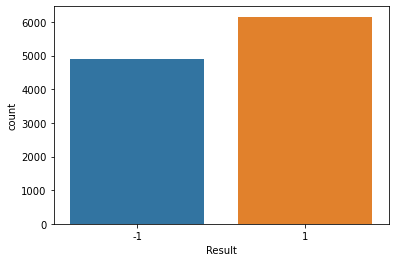

In [21]:
import seaborn as sns
sns.countplot(df['Result'])

In [22]:
#Unique values for each columns
col=df.columns
for i in col:
     if  i!='index':
        print(i,f[i].unique())

having_IPhaving_IP_Address [-1  1]
URLURL_Length [ 1  0 -1]
Shortining_Service [ 1 -1]
having_At_Symbol [ 1 -1]
double_slash_redirecting [-1  1]
Prefix_Suffix [-1  1]
having_Sub_Domain [-1  0  1]
SSLfinal_State [-1  1  0]
Domain_registeration_length [-1  1]
Favicon [ 1 -1]
port [ 1 -1]
HTTPS_token [-1  1]
Request_URL [ 1 -1]
URL_of_Anchor [-1  0  1]
Links_in_tags [ 1 -1  0]
SFH [-1  1  0]
Submitting_to_email [-1  1]
Abnormal_URL [-1  1]
Redirect [0 1]
on_mouseover [ 1 -1]
RightClick [ 1 -1]
popUpWidnow [ 1 -1]
Iframe [ 1 -1]
age_of_domain [-1  1]
DNSRecord [-1  1]
web_traffic [-1  0  1]
Page_Rank [-1  1]
Google_Index [ 1 -1]
Links_pointing_to_page [ 1  0 -1]
Statistical_report [-1  1]
Result [-1  1]


In [23]:
# col=f.columns
# for column in col:
# f[column] =f[column].replace(-1,0)
    

In [24]:
#Replacing -1 with 0 
f['Result']=f['Result'].replace(-1,0)

In [25]:
f.shape

(11055, 32)

In [27]:
# Print correlation with target variable
print(f.corr()['Result'].sort_values())      
 

Domain_registeration_length   -0.225789
Shortining_Service            -0.067966
Abnormal_URL                  -0.060488
HTTPS_token                   -0.039854
double_slash_redirecting      -0.038608
Redirect                      -0.020113
Iframe                        -0.003394
Favicon                       -0.000280
popUpWidnow                    0.000086
index                          0.000978
RightClick                     0.012653
Submitting_to_email            0.018249
Links_pointing_to_page         0.032574
port                           0.036419
on_mouseover                   0.041838
having_At_Symbol               0.052948
URLURL_Length                  0.057430
DNSRecord                      0.075718
Statistical_report             0.079857
having_IPhaving_IP_Address     0.094160
Page_Rank                      0.104645
age_of_domain                  0.121496
Google_Index                   0.128950
SFH                            0.221419
Links_in_tags                  0.248229


In [28]:
plt.figure(figsize=(15,15))
sns.heatmap(f.corr(),linewidth=.5)

NameError: name 'plt' is not defined

In [29]:
import matplotlib.pyplot as plt
import os

<AxesSubplot:>

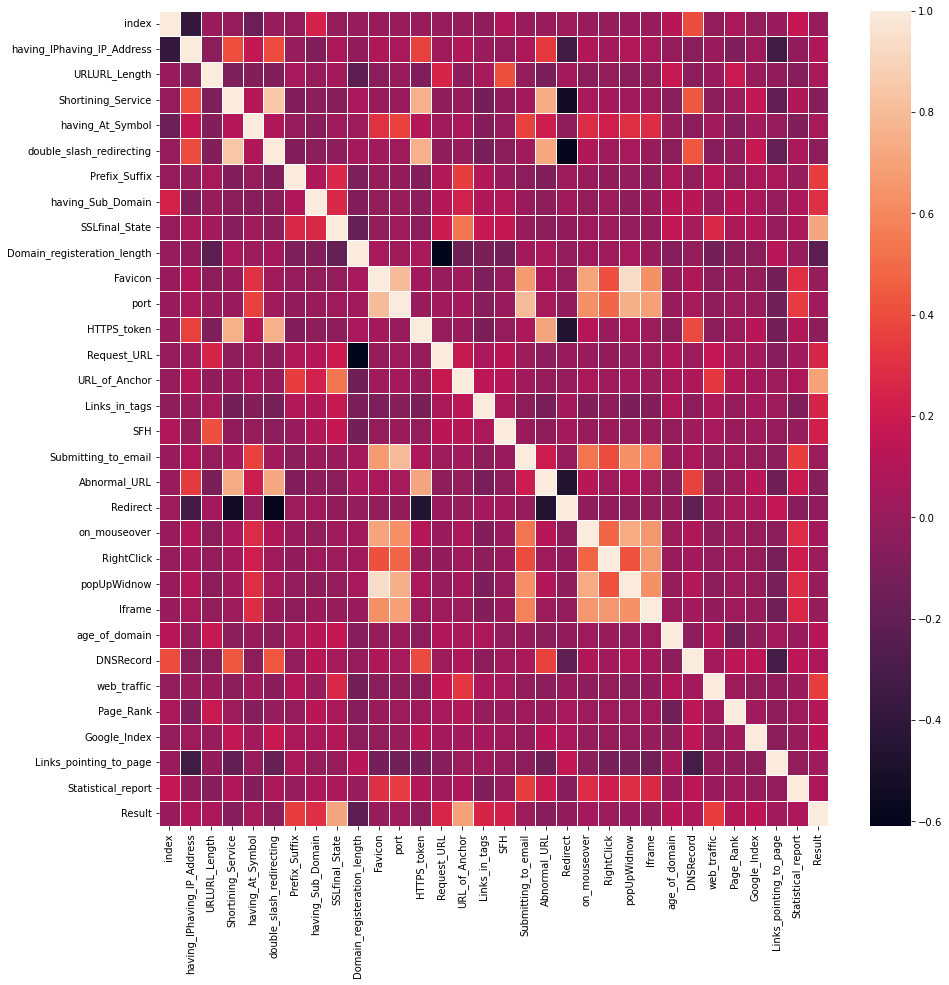

In [33]:
plt.figure(figsize=(15,15))
sns.heatmap(f.corr(),linewidth=.5)

# MODEL BUILDING
TESTING AND TRAINING DATA SET

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score

X=f.drop(columns='Result')
Y=f['Result']

train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=2)

# LOGISTIC REGRESSION